# DreamData Data Science Challange

Tobias Morville

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('training_data.csv')

### Contents

1. Data
2. Preprocessing
3. Modeling
4. Explaination modeling
5. Conclusions
6. Fixes and shortcomings
7. Future possibilities

## 1. Data

Press down to continue or press right to skip to conclusions.

In [3]:
data.head(n=10)

,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,session_end_time,session_start_time,event_count,country,session_duration_seconds,later_session_start_time,region,sub_region,source
0,False,NaN,1,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-04 07:55:15.048 UTC,2020-05-04 07:55:15.048 UTC,1,NaN,0,NaN,NaN,NaN,Google
1,False,NaN,2,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-05-11 03:49:15.592 UTC,2020-05-11 03:49:15.592 UTC,1,NaN,0,NaN,NaN,NaN,Google
2,False,NaN,3,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2020-02-28 22:00:46.528 UTC,2020-02-28 22:00:46.528 UTC,1,NaN,0,NaN,NaN,NaN,Google
3,False,NaN,4,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-21 21:50:58.028 UTC,2020-03-21 21:50:58.028 UTC,1,NaN,0,NaN,NaN,NaN,Google
4,False,NaN,5,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-09 14:53:37.777 UTC,2020-03-09 14:53:37.777 UTC,1,NaN,0,NaN,NaN,NaN,Google
5,False,NaN,6,1,0,page_view,Chrome,Windows,DESKTOP,Organic Search,2019-12-11 10:27:15.083 UTC,2019-12-11 10:27:15.083 UTC,1,NaN,0,NaN,NaN,NaN,Google
6,False,NaN,7,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2019-11-18 12:22:03.067 UTC,2019-11-18 12:22:03.067 UTC,1,NaN,0,2019-11-18 12:22:45.192 UTC,NaN,NaN,Google
7,False,NaN,7,2,7,page_view,Chrome,Windows,DESKTOP,direct,2019-11-18 12:30:02.486 UTC,2019-11-18 12:22:45.192 UTC,3,NaN,437,2019-11-18 16:09:14.74 UTC,NaN,NaN,direct
8,False,NaN,7,3,222,page_view,Chrome,Windows,DESKTOP,direct,2019-11-18 16:12:10.117 UTC,2019-11-18 16:09:14.74 UTC,9,NaN,175,NaN,NaN,NaN,direct
9,False,NaN,8,1,0,page_view,Chrome,Windows,DESKTOP,Paid,2020-03-12 17:11:24.35 UTC,2020-03-12 17:11:24.35 UTC,1,NaN,0,NaN,NaN,NaN,Google


In [4]:
data.shape

(2406154, 19)

Fix time

In [5]:
data['session_start_time'] = pd.to_datetime(data['session_start_time'], format='%Y-%m-%d %H:%M:%S.%f %Z', errors='coerce')
data['session_end_time'] = pd.to_datetime(data['session_end_time'], format='%Y-%m-%d %H:%M:%S.%f %Z', errors='coerce')
data['later_session_start_time'] = pd.to_datetime(data['later_session_start_time'], format='%Y-%m-%d %H:%M:%S.%f %Z', errors='coerce')
data['conversion_time'] = pd.to_datetime(data['conversion_time'], format='%Y-%m-%d %H:%M:%S.%f %Z', errors='coerce')

In [139]:
# Print # of unique to get an idea of distribution of users/events over rows

for c in data:
    print(c, data[c].nunique())

conversion 2
conversion_time 36077
user_id 1349153
sessionId 10540
minutes_since_last_session 79198
event 2
browser 87
os 17
device 4
channel 8
session_end_time 2403241
session_start_time 2403200
event_count 223
country 143
session_duration_seconds 12364
later_session_start_time 1055778
region 5
sub_region 15
source 50


In [7]:
# conversion events as fraction

data.conversion.sum()/len(data)

0.016490631937939135

In [8]:
# number of channels

data.channel.nunique()

8

In [116]:
# number of sources

data.source.nunique()

50

In [9]:
# checking how sessionId relates to user_id 

for i, j in zip(data.user_id.value_counts()[:50].index, data.user_id.value_counts()[:50]):
    print(len(data[data.user_id == i]), j)

10540 10540
8803 8803
8486 8486
6626 6626
4960 4960
4445 4445
3872 3872
2781 2781
1798 1798
1751 1751
1406 1406
1219 1219
1164 1164
1141 1141
1137 1137
682 682
664 664
609 609
503 503
465 465
456 456
449 449
443 443
436 436
425 425
406 406
378 378
352 352
344 344
344 344
339 339
335 335
334 334
332 332
331 331
330 330
322 322
314 314
306 306
301 301
294 294
285 285
285 285
285 285
281 281
278 278
275 275
272 272
267 267
261 261


In [140]:
conversion_rate_by_channel = data[data.conversion==True].channel.value_counts().sort_index()/data.channel.value_counts().drop(['Instant Message']).sort_index()

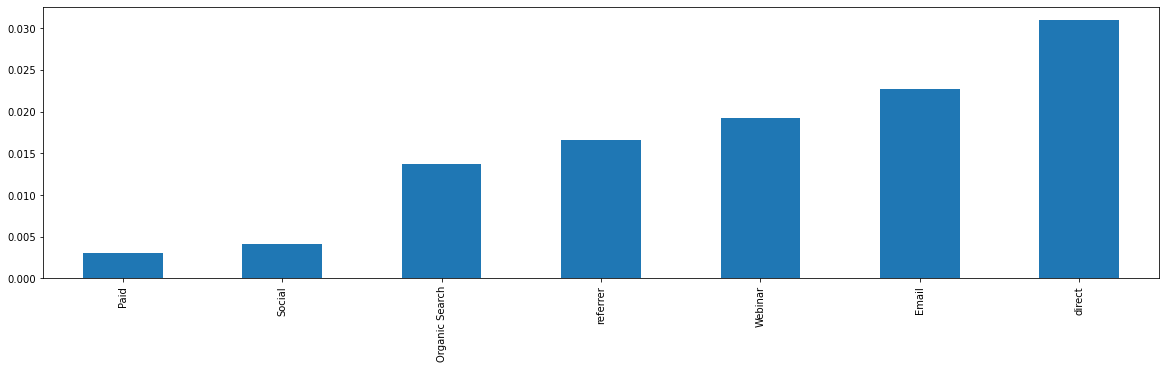

In [141]:
conversion_rate_by_channel.sort_values().plot(kind='bar', figsize=(20, 5))

In [ ]:
conversion_rate_by_source = data[data.conversion==True].source.value_counts().sort_index()/data.source.value_counts().sort_index()[list(data[data.conversion==True].source.value_counts().index)].sort_index()

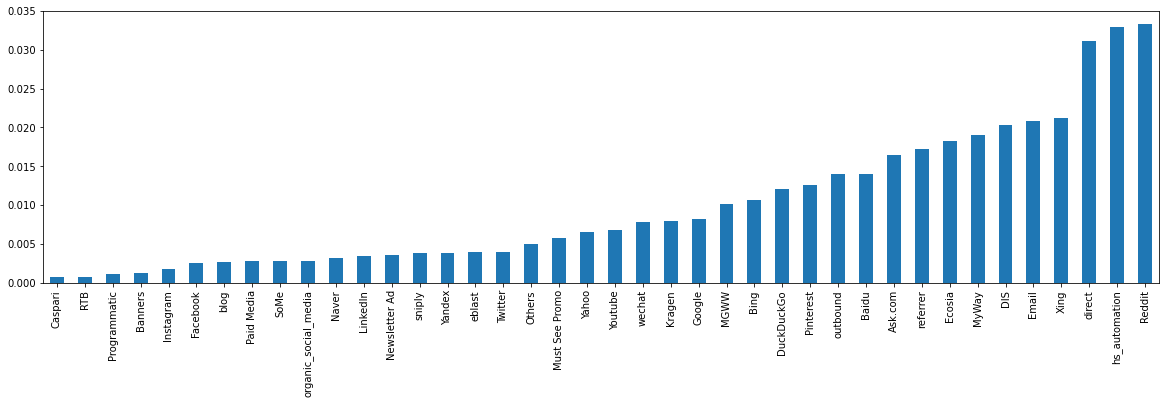

In [142]:
conversion_rate_by_source.sort_values().plot(kind='bar', figsize=(20, 5))

Observations so far:

* There is no unique journey id.
* sessionId is almost as unique as rows. It wont use useful to create unique journeys from. An alternative is to use timestamps, however this requires more time.
* Very few events (~1.6%) are conversion events. This is a problem when training a binary classifier, consider downsampling.
* There is no campaign id, so attribution will have to happen on basis of channels of which there are only 8
* The *direct* channel has the best hit/conversion ratio
* *Reddit* has the best hit/conversion ratio

## 2. Preprocessing

Press down to see details, press right to skip to modeling.

In [12]:
def downsample(data):
    
    # pick out all conversions
    pconvs = data[data.conversion == True]
    nconvs = data[data.conversion == False]
    
    print("{} conversion events.".format(len(pconvs)))
    
    n = len(pconvs)

    return pd.concat([pconvs, nconvs.sample(n)])

In [13]:
data_t0 = downsample(data)

39679 conversion events.


In [14]:
data_t0

,conversion,conversion_time,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,session_end_time,session_start_time,event_count,country,session_duration_seconds,later_session_start_time,region,sub_region,source
208,True,2019-12-18 07:13:07.948000+00:00,104,3,38905,page_view,Chrome,Windows,DESKTOP,direct,2020-01-14 07:38:14.797000+00:00,2020-01-14 07:38:04.719000+00:00,2,NaN,10,NaT,NaN,NaN,direct
229,True,2020-05-19 21:52:18.363000+00:00,111,4,11,page_view,Chrome,Windows,DESKTOP,direct,2020-05-19 21:57:28.975000+00:00,2020-05-19 21:51:14.923000+00:00,3,NaN,374,2020-05-21 21:52:44.081000+00:00,NaN,NaN,direct
412,True,2020-02-11 14:16:40.817000+00:00,217,4,70,page_view,Chrome,Windows,DESKTOP,direct,2020-02-11 15:26:31.879000+00:00,2020-02-11 15:26:31.879000+00:00,1,Russian Federation,0,2020-02-18 10:42:31.820000+00:00,Europe,Eastern Europe,direct
510,True,2019-11-25 09:16:48.020000+00:00,279,3,1,page_view,Chrome,Windows,DESKTOP,direct,2019-11-25 09:19:26.652000+00:00,2019-11-25 09:12:22.262000+00:00,4,NaN,424,NaT,NaN,NaN,direct
511,True,2019-11-25 09:16:48.020000+00:00,279,4,410,page_view,Chrome,Windows,DESKTOP,Paid,2019-11-25 09:18:23.902000+00:00,2019-11-25 09:18:23.902000+00:00,1,NaN,0,2019-11-25 09:12:22.262000+00:00,NaN,NaN,Kragen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771660,False,NaT,985423,1,0,page_view,Firefox,Windows,DESKTOP,Paid,2020-07-02 09:19:46.596000+00:00,2020-07-02 09:19:46.596000+00:00,1,NaN,0,NaT,NaN,NaN,Others
839337,False,NaT,471282,1,0,page_view,Instagram,iOS,MOBILE,Paid,2020-02-17 17:23:44.383000+00:00,2020-02-17 17:23:44.383000+00:00,1,NaN,0,NaT,NaN,NaN,Kragen
2311960,False,NaT,1287942,1,0,page_view,Chrome,Linux,DESKTOP,Paid,2020-05-19 06:45:41.088000+00:00,2020-05-19 06:45:22.990000+00:00,4,NaN,18,NaT,NaN,NaN,Banners
883184,False,NaT,484775,3,27702,page_view,Chrome,Windows,DESKTOP,Paid,2019-12-26 06:03:15.577000+00:00,2019-12-26 06:03:14.507000+00:00,4,NaN,1,2020-01-11 01:19:17.240000+00:00,NaN,NaN,Google


Make time-based features

In [15]:
def time_based_features(data):
    
    # session start time
    data['sess_start_time_sec'] = data.session_start_time.dt.second
    data['sess_start_time_min'] = data.session_start_time.dt.minute
    data['sess_start_time_hr'] = data.session_start_time.dt.hour
    data['sess_start_time_day'] = data.session_start_time.dt.day
    data['sess_start_time_wk'] = data.session_start_time.dt.week
    data['sess_start_time_mth'] = data.session_start_time.dt.month
    data['sess_start_time_yr'] = data.session_start_time.dt.year
    
    # session end time 
    data['sess_end_time_sec'] = data.session_end_time.dt.second
    data['sess_end_time_min'] = data.session_end_time.dt.minute
    data['sess_end_time_hr'] = data.session_end_time.dt.hour
    data['sess_end_time_day'] = data.session_end_time.dt.day
    data['sess_end_time_wk'] = data.session_end_time.dt.week
    data['sess_end_time_mth'] = data.session_end_time.dt.month
    data['sess_end_time_yr'] = data.session_end_time.dt.year
    
    
    # dropping conversion_time for obvious reasons, can add later_session_start_time if nessensary
    _data = data.drop(['conversion_time', 'session_end_time', 'session_start_time', 'later_session_start_time'], axis=1)
    
    return _data

In [16]:
data_t1 = time_based_features(data_t0)

In [17]:
data_t1

,conversion,user_id,sessionId,minutes_since_last_session,event,browser,os,device,channel,event_count,...,sess_start_time_wk,sess_start_time_mth,sess_start_time_yr,sess_end_time_sec,sess_end_time_min,sess_end_time_hr,sess_end_time_day,sess_end_time_wk,sess_end_time_mth,sess_end_time_yr
208,True,104,3,38905,page_view,Chrome,Windows,DESKTOP,direct,2,...,3.0,1.0,2020.0,14.0,38.0,7.0,14.0,3.0,1.0,2020.0
229,True,111,4,11,page_view,Chrome,Windows,DESKTOP,direct,3,...,21.0,5.0,2020.0,28.0,57.0,21.0,19.0,21.0,5.0,2020.0
412,True,217,4,70,page_view,Chrome,Windows,DESKTOP,direct,1,...,7.0,2.0,2020.0,31.0,26.0,15.0,11.0,7.0,2.0,2020.0
510,True,279,3,1,page_view,Chrome,Windows,DESKTOP,direct,4,...,48.0,11.0,2019.0,26.0,19.0,9.0,25.0,48.0,11.0,2019.0
511,True,279,4,410,page_view,Chrome,Windows,DESKTOP,Paid,1,...,48.0,11.0,2019.0,23.0,18.0,9.0,25.0,48.0,11.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771660,False,985423,1,0,page_view,Firefox,Windows,DESKTOP,Paid,1,...,27.0,7.0,2020.0,46.0,19.0,9.0,2.0,27.0,7.0,2020.0
839337,False,471282,1,0,page_view,Instagram,iOS,MOBILE,Paid,1,...,8.0,2.0,2020.0,44.0,23.0,17.0,17.0,8.0,2.0,2020.0
2311960,False,1287942,1,0,page_view,Chrome,Linux,DESKTOP,Paid,4,...,21.0,5.0,2020.0,41.0,45.0,6.0,19.0,21.0,5.0,2020.0
883184,False,484775,3,27702,page_view,Chrome,Windows,DESKTOP,Paid,4,...,52.0,12.0,2019.0,15.0,3.0,6.0,26.0,52.0,12.0,2019.0


Label encode

In [18]:
from sklearn import preprocessing

In [57]:
def encode_labels(data):
    
    str_feats = ['event', 'browser', 'os', 'device', 'channel', 'country', 'region', 'sub_region', 'source']
    
    le = preprocessing.LabelEncoder()
    
    _data = data[str_feats].fillna('NaN')
        
    t = _data.apply(le.fit_transform)
    
    return pd.merge(data.drop(str_feats, axis=1), t, left_index=True, right_index=True), le

In [58]:
data_t2, le = encode_labels(data_t1)

In [21]:
data_t2

,conversion,user_id,sessionId,minutes_since_last_session,event_count,session_duration_seconds,sess_start_time_sec,sess_start_time_min,sess_start_time_hr,sess_start_time_day,...,sess_end_time_yr,event,browser,os,device,channel,country,region,sub_region,source
208,True,104,3,38905,2,10,4.0,38.0,7.0,14.0,...,2020.0,1,3,9,0,5,81,4,5,36
229,True,111,4,11,3,374,14.0,51.0,21.0,19.0,...,2020.0,1,3,9,0,5,81,4,5,36
412,True,217,4,70,1,0,31.0,26.0,15.0,11.0,...,2020.0,1,3,9,0,5,95,3,3,36
510,True,279,3,1,4,424,22.0,12.0,9.0,25.0,...,2019.0,1,3,9,0,5,81,4,5,36
511,True,279,4,410,1,0,23.0,18.0,9.0,25.0,...,2019.0,1,3,9,0,2,81,4,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771660,False,985423,1,0,1,0,46.0,19.0,9.0,2.0,...,2020.0,1,8,9,0,2,81,4,5,22
839337,False,471282,1,0,1,0,44.0,23.0,17.0,17.0,...,2020.0,1,14,11,1,2,81,4,5,14
2311960,False,1287942,1,0,4,18,22.0,45.0,6.0,19.0,...,2020.0,1,3,4,0,2,81,4,5,2
883184,False,484775,3,27702,4,1,14.0,3.0,6.0,26.0,...,2019.0,1,3,9,0,2,81,4,5,12


Remove unique identifiers

In [22]:
def rmv_unique_identifiers(data):
    return data.drop(['user_id', 'sessionId'], axis=1)

In [23]:
data_t3 = rmv_unique_identifiers(data_t2)

In [24]:
data_t3

,conversion,minutes_since_last_session,event_count,session_duration_seconds,sess_start_time_sec,sess_start_time_min,sess_start_time_hr,sess_start_time_day,sess_start_time_wk,sess_start_time_mth,...,sess_end_time_yr,event,browser,os,device,channel,country,region,sub_region,source
208,True,38905,2,10,4.0,38.0,7.0,14.0,3.0,1.0,...,2020.0,1,3,9,0,5,81,4,5,36
229,True,11,3,374,14.0,51.0,21.0,19.0,21.0,5.0,...,2020.0,1,3,9,0,5,81,4,5,36
412,True,70,1,0,31.0,26.0,15.0,11.0,7.0,2.0,...,2020.0,1,3,9,0,5,95,3,3,36
510,True,1,4,424,22.0,12.0,9.0,25.0,48.0,11.0,...,2019.0,1,3,9,0,5,81,4,5,36
511,True,410,1,0,23.0,18.0,9.0,25.0,48.0,11.0,...,2019.0,1,3,9,0,2,81,4,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771660,False,0,1,0,46.0,19.0,9.0,2.0,27.0,7.0,...,2020.0,1,8,9,0,2,81,4,5,22
839337,False,0,1,0,44.0,23.0,17.0,17.0,8.0,2.0,...,2020.0,1,14,11,1,2,81,4,5,14
2311960,False,0,4,18,22.0,45.0,6.0,19.0,21.0,5.0,...,2020.0,1,3,4,0,2,81,4,5,2
883184,False,27702,4,1,14.0,3.0,6.0,26.0,52.0,12.0,...,2019.0,1,3,9,0,2,81,4,5,12


Train-test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_t3.drop(['conversion'], axis=1), data_t3.conversion.astype('int'), test_size=0.33, random_state=42)

In [27]:
X_train.shape, y_train.shape

((53169, 26), (53169,))

In [28]:
X_train

,minutes_since_last_session,event_count,session_duration_seconds,sess_start_time_sec,sess_start_time_min,sess_start_time_hr,sess_start_time_day,sess_start_time_wk,sess_start_time_mth,sess_start_time_yr,...,sess_end_time_yr,event,browser,os,device,channel,country,region,sub_region,source
1900001,0,1,0,27.0,8.0,12.0,9.0,15.0,4.0,2020.0,...,2020.0,1,3,0,1,2,81,4,5,12
127801,0,1,0,59.0,48.0,7.0,3.0,6.0,2.0,2020.0,...,2020.0,1,5,9,0,1,81,4,5,12
761226,0,1,0,41.0,37.0,2.0,12.0,20.0,5.0,2020.0,...,2020.0,1,3,9,0,2,81,4,5,14
635913,0,42,5497,17.0,0.0,20.0,14.0,3.0,1.0,2020.0,...,2020.0,1,3,9,0,5,123,1,7,36
643943,0,7,30,38.0,33.0,17.0,19.0,51.0,12.0,2019.0,...,2019.0,1,32,11,1,5,77,1,4,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390724,1,4,1911,21.0,20.0,1.0,2.0,49.0,12.0,2019.0,...,2019.0,1,3,9,0,5,81,4,5,36
1930492,0,1,0,46.0,3.0,15.0,30.0,18.0,4.0,2020.0,...,2020.0,1,5,9,0,5,81,4,5,36
585703,17,12,1032,10.0,9.0,6.0,28.0,5.0,1.0,2020.0,...,2020.0,1,15,9,0,5,81,4,5,36
55010,6,5,349,14.0,22.0,15.0,28.0,5.0,1.0,2020.0,...,2020.0,1,32,12,0,5,88,1,4,36


## 3. Modeling conversions with XGBoost

Press down for details, right for results

In [29]:
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [31]:
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.79%


Quite impressive results (~90% accuracy and precision) for a very simple setup. 

However, this will probably not reflect accuracy in production due to downsampling of negative events.

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     13040
           1       0.89      0.91      0.90     13149

    accuracy                           0.90     26189
   macro avg       0.90      0.90      0.90     26189
weighted avg       0.90      0.90      0.90     26189



## 4. Model explaination model (SHAPELY additive values)

Press down to see details, press right to skip to conclusions.

In [33]:
import shap

shap.initjs()

In [35]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


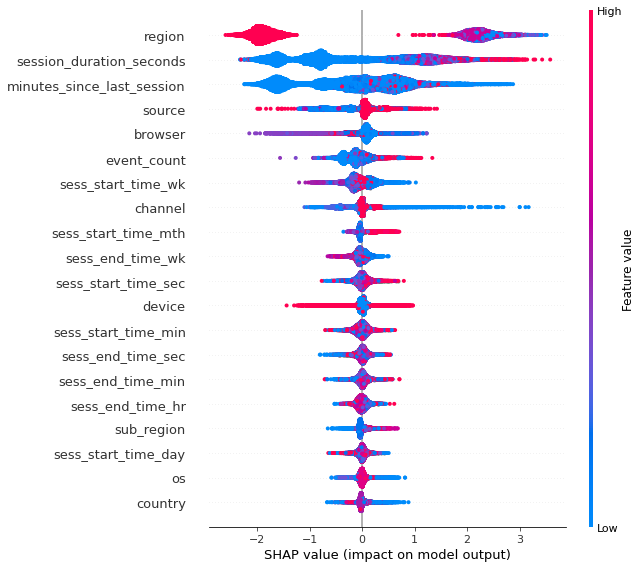

In [50]:
shap.summary_plot(shap_values, X_test)

Observations from summary plot:

* Some regions clearly increase the probability of conversion
* As expected, more time per duration increases the probability of conversion as well
* There also seems to be a convincing pattern between source and channel as well

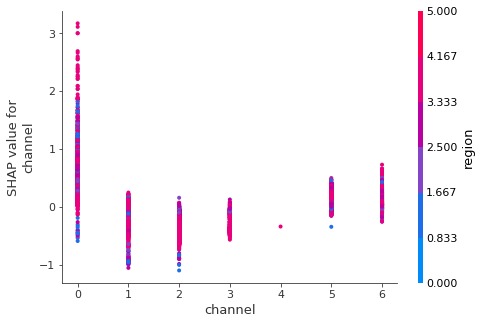

In [131]:
shap.dependence_plot("channel", shap_values, X_test)

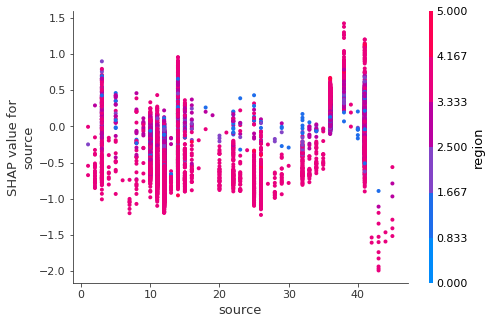

In [132]:
shap.dependence_plot("source", shap_values, X_test)

Observations from dependence plots

* Seems like some channels are better at converting leads (driving up probability of conversion) than others
* Same conclusion with source 
* Both plots warrents a deep dive into each source

In [146]:
import matplotlib.pyplot as plt

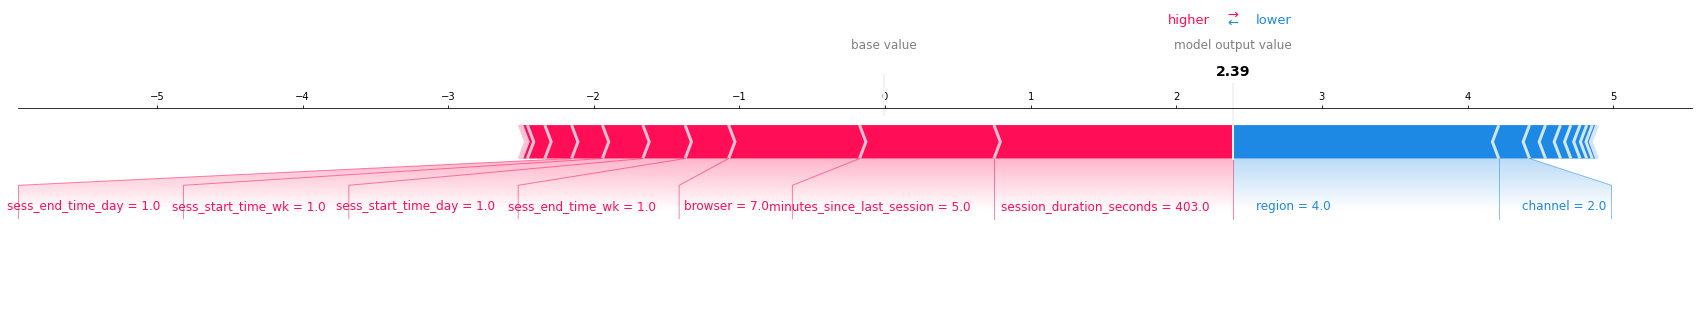

In [153]:
# Conversion
fig = shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], show=False, matplotlib=True, figsize=(30, 4))

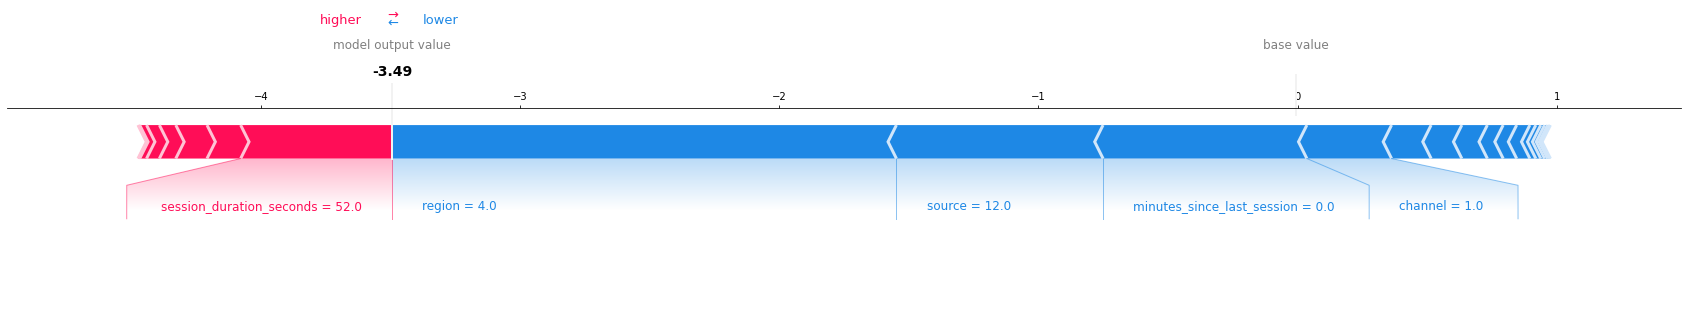

In [154]:
# Non-conversion
fig = shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], show=False, matplotlib=True, figsize=(30, 4))

Individual lead plots show, in detail, what increases and decreases the probability of conversion for that one lead. E.g. for the converted lead, we can see that increased activity (high session duration, low number of mintues since last session) increases the probability of conversion significantly. On both plots, we can see that coming from region 4 decreases the probability of conversion.

SHAPELY additive values gives a ...

* internally consistent framework for tackling complex attribution problems on several levels of granularity, e.g. overall, dependence between factors and individual lead level.
* allows for single simulation experiments ala "How much more conversion will we see if we increase the duration time for this specific group of clients?".
* auxilary variables, such as browser, region, etc. are treated in the same framework as the attribution target (e.g. source, campaign, channel) which is a not possible for standard modelslike Markov Chains.

## 5. Overall conclusions

* XGBoost provides a easy-to-implement and fast framework for binary classification of conversions
* ~90% accuracy, precision and recall without any parameter tuning on a balanced data set
* SHAPELY additive values gives a alternative (and perhaps superior?) framework for attribution modeling
* Allows extremely detailed insights all the way down to single lead level
* Allows simulations, e.g. "What parameters should we focus on increasing to increase the probability of conversion?"

## 6. Fixes and shortcomings

* Sessions should be massaged into a format that allows sequence modeling
* There are no campaign ids
* There is no click information
* There is no cost/price/revenue information

---

* XGBoost ignores temporal information
* Not easy to interpret without an explanatory model
* Does not solve the cold-start problem

## 7. Future possibilities

* With any kind of finansial data it would be easy to add spend optimisation
* Sequence modeling with LSTMs would allow to predict each customers next step
* Online learning with contextual bandits would solve the cold start problem for new clients that does not have data
* Transfer learning between clients, how much can we learn between clients?